## HGCDPG analysis framework
**setup the environment** <br>
`source /cvmfs/sft.cern.ch/lcg/views/dev3/latest/x86_64-centos7-gcc10-opt/setup.csh` 
<br>
**jupyter notebook** <br>
`jupyter notebook`

In [1]:
import awkward as ak
import numpy as np
import uproot

In [2]:
print (ak.__version__)
print (uproot.__version__)

1.0.2
4.0.1


In [21]:
root_file = uproot.open("ntuple_1photon_Pt26p58_eta2p0_pu_pyth.root")
root_file.classnames()

{'hgcAnalyzer': 'TDirectory', 'hgcAnalyzer/tree': 'TTree'}

In [22]:
events = root_file["hgcAnalyzer/tree"]
events

<TTree 'tree' (101 branches) at 0x7fbd6c1e4fa0>

In [23]:
events.show()

name                 | typename                 | interpretation                
---------------------+--------------------------+-------------------------------
genParticle          | vector<ROOT::Math::Lo... | AsGroup(<TBranchElement 'ge...
genParticle/genPa... | double[]                 | AsJagged(AsDtype('>f8'))
genParticle/genPa... | double[]                 | AsJagged(AsDtype('>f8'))
genParticle/genPa... | double[]                 | AsJagged(AsDtype('>f8'))
genParticle/genPa... | double[]                 | AsJagged(AsDtype('>f8'))
genParticlePosition  | vector<ROOT::Math::Po... | AsGroup(<TBranchElement 'ge...
genParticlePositi... | float[]                  | AsJagged(AsDtype('>f4'))
genParticlePositi... | float[]                  | AsJagged(AsDtype('>f4'))
genParticlePositi... | float[]                  | AsJagged(AsDtype('>f4'))
genPdgId             | std::vector<int32_t>     | AsJagged(AsDtype('>i4'), he...
lcEnergy             | std::vector<float>       | AsJagged(AsDtype('>f

In [6]:
array = events["genParticle"].array()
array.type

1000 * {"genParticle.fCoordinates.fX": var * float64, "genParticle.fCoordinates.fY": var * float64, "genParticle.fCoordinates.fZ": var * float64, "genParticle.fCoordinates.fT": var * float64}

In [7]:
array["genParticle.fCoordinates.fX"]

<Array [[21.1], [-0.256], ... [11.1], [-7.21]] type='1000 * var * float64'>

In [8]:
gX = ak.flatten(array["genParticle.fCoordinates.fX"],axis=None)
gY = ak.flatten(array["genParticle.fCoordinates.fY"],axis=None)

In [9]:
from matplotlib import pyplot as plt

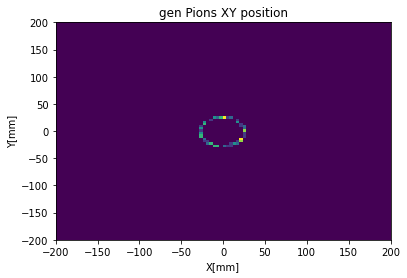

In [10]:
plt.hist2d(ak.to_list(gX), ak.to_list(gY), bins=100, range=([-200,200],[-200,200]))
plt.title("gen Pions XY position")
plt.xlabel('X[mm]')
plt.ylabel('Y[mm]')
plt.show()

In [40]:
x1=array["genParticle.fCoordinates.fX"][:,0]
x2=array["genParticle.fCoordinates.fX"][:,1]
y1=array["genParticle.fCoordinates.fY"][:,0]
y2=array["genParticle.fCoordinates.fY"][:,1]

In [41]:
dr=np.sqrt((x1-x2)**2+(y1-y1)**2)

In [42]:
print (dr)

[21.4, 8.38, 10.8, 27.6, 49.4, 46.2, 4.28, ... 5.92, 48.9, 1.46, 39.9, 11.7, 25.7]


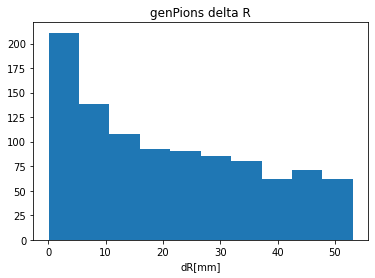

In [44]:
plt.hist(dr)
plt.title("genPions delta R")
plt.xlabel('dR[mm]')
#plt.ylabel('Y[mm]')
plt.show()

In [26]:
cp_array=events["cpOrigin"].array()

In [27]:
cp_np=ak.count(cp_array['cpOrigin.fCoordinates.fX'],axis=1)

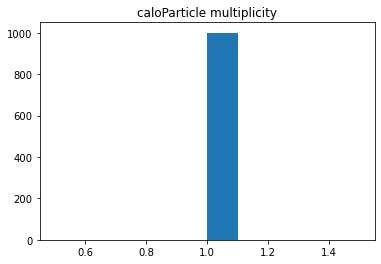

In [28]:
plt.hist(ak.count(cp_array['cpOrigin.fCoordinates.fX'],axis=1))
plt.title("caloParticle multiplicity")
#plt.xlabel('dR[mm]')
#plt.ylabel('Y[mm]')
plt.show()

In [113]:
new_cp_array=cp_array[ak.count(cp_array['cpOrigin.fCoordinates.fX'],axis=1)>1]

In [114]:
x1=new_cp_array["cpOrigin.fCoordinates.fX"][:,0]
x2=new_cp_array["cpOrigin.fCoordinates.fX"][:,1]
y1=new_cp_array["cpOrigin.fCoordinates.fY"][:,0]
y2=new_cp_array["cpOrigin.fCoordinates.fY"][:,1]
dr=np.sqrt((x1-x2)**2+(y1-y1)**2)

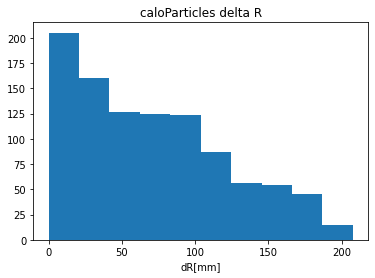

In [115]:
plt.hist(dr)
plt.title("caloParticles delta R")
plt.xlabel('dR[mm]')
#plt.ylabel('Y[mm]')
plt.show()

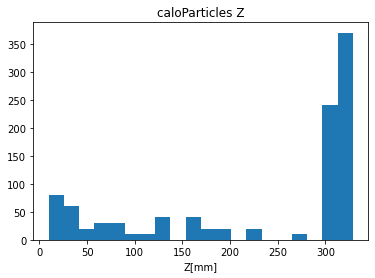

In [13]:
plt.hist(ak.flatten(cp_array["cpOrigin.fCoordinates.fZ"]),bins=20)
plt.title("caloParticles Z")
plt.xlabel('Z[mm]')
#plt.ylabel('Y[mm]')
plt.show()

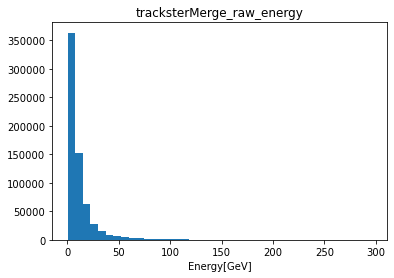

In [25]:
plt.hist(ak.flatten(events["tracksterMerge_raw_energy"].array()),bins=40)
plt.title("tracksterMerge_raw_energy")
plt.xlabel('Energy[GeV]')
#plt.ylabel('Y[mm]')
plt.show()

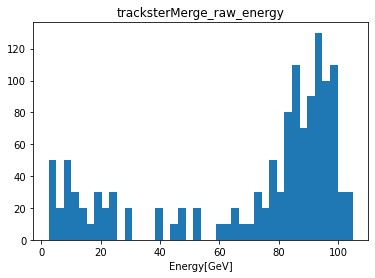

In [19]:
plt.hist(ak.flatten(events["tracksterMerge_raw_energy"].array()),bins=40)
plt.title("tracksterMerge_raw_energy")
plt.xlabel('Energy[GeV]')
#plt.ylabel('Y[mm]')
plt.show()

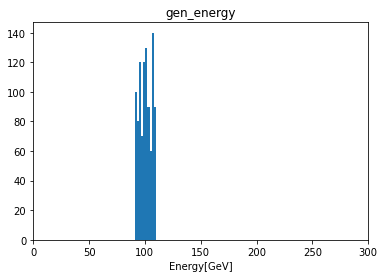

In [32]:
plt.hist(ak.flatten(events["genParticle.fCoordinates.fT"].array()),bins=10)
plt.title("gen_energy")
plt.xlabel('Energy[GeV]')
plt.xlim(0, 300)
#plt.ylabel('Y[mm]')
plt.show()

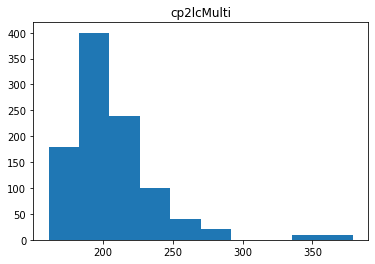

In [72]:
plt.hist(ak.num(test),bins=10)
plt.title("cp2lcMulti")
#plt.xlabel('Energy[GeV]')
#plt.xlim(0, 300)
#plt.ylabel('Y[mm]')
plt.show()

In [58]:
test = ak.flatten(events["cp2lcEnergy"].array(),axis=2)
type(test)

awkward.highlevel.Array

In [67]:
ak.num(events["cp2lcEnergy"].array(),axis=2)

<Array [[252], [225], ... [206], [162]] type='1000 * var * int64'>

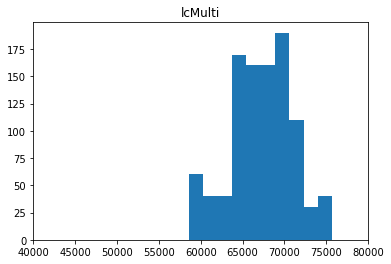

In [71]:
#new_cp_array=cp_array[ak.count(cp_array['lcEnergy'],axis=1)>1]
plt.hist(ak.num(events['lcEnergy'].array()),bins=10)
plt.title("lcMulti")
#plt.xlabel('Energy[GeV]')
plt.xlim(40000, 80000)
#plt.ylabel('Y[mm]')
plt.show()

In [76]:
ak.num(events["tracksterMerge_vertices"].array())

<Array [704, 698, 698, 574, ... 699, 572, 598] type='1000 * int64'>

In [73]:
events["cp2lcId"].array()

<Array [[[73223, 73222, ... 124000, 123999]]] type='1000 * var * var * int64'>